# **Deep Learning Models for Time Series Analysis - Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs)**

## _Machine Learning Modelling Workflow Notebook 4_

## Content:
1. Converting the datasets into NumPy arrays with correct format for CNN and RNN Architectures;
2. Splitting the dataframe into train and test subsets;
3. Retrieving the list of classes used for training the classification models;
4. Convolutional Neural Network (CNN) Architecture;
5. Simplified Long Short-Term Memory (LSTM) Recurrent Neural Network (RNN) Architecture;
6. Encoder-Decoder Recurrent Neural Network (RNN) Architecture;
7. CNN-LSTM Hybrid Architecture;
8. Calculating metrics for regression models;
9. Calculating metrics for classification models;
10. Making predictions with the models;
11. Calculating probabilities associated to each class;
12. Time series visualization.

Marco Cesar Prado Soares, Data Scientist Specialist - Bayer Crop Science LATAM
- marcosoares.feq@gmail.com
- marco.soares@bayer.com

In [ ]:
# To install a library (e.g. tensorflow), unmark and run:
# ! pip install tensorflow
# to update a library (e.g. tensorflow), unmark and run:
# ! pip install tensorflow --upgrade
# to update pip, unmark and run:
# ! pip install pip --upgrade
# to show if a library is installed and visualize its information, unmark and run
# (e.g. tensorflow):
# ! pip show tensorflow
# To run a Python file (e.g idsw_etl.py) saved in the notebook's workspace directory,
# unmark and run:
# import idsw_etl
# or:
# import idsw_etl as etl

## **Load Python Libraries in Global Context**

In [ ]:
import tensorflow as tf
# Import all needed functions and classes with original names, with no aliases:
from idsw import *

## **Call the functions**

### **Mounting Google Drive or S3 (AWS Simple Storage Service) bucket**

In [ ]:
SOURCE = 'aws'
# SOURCE = 'google' for mounting the google drive;
# SOURCE = 'aws' for accessing an AWS S3 bucket

## THE FOLLOWING PARAMETERS HAVE EFFECT ONLY WHEN SOURCE == 'aws':

PATH_TO_STORE_IMPORTED_S3_BUCKET = ''
# PATH_TO_STORE_IMPORTED_S3_BUCKET: path of the Python environment to which the
# S3 bucket contents will be imported. If it is None; or if it is an empty string; or if 
# PATH_TO_STORE_IMPORTED_S3_BUCKET = '/', bucket will be imported to the root path. 
# Alternatively, input the path as a string (in quotes). e.g. 
# PATH_TO_STORE_IMPORTED_S3_BUCKET = 'copied_s3_bucket'

S3_BUCKET_NAME = 'my_bucket'
## This parameter is obbligatory to access an AWS S3 bucket. Substitute it for a string
# with the bucket's name. e.g. s3_bucket_name = "aws-bucket-1" access a bucket named as
# "aws-bucket-1"

S3_OBJECT_FOLDER_PREFIX = ""
# S3_OBJECT_FOLDER_PREFIX = None. Keep it None; or as an empty string 
# (S3_OBJECT_FOLDER_PREFIX = ''); or as the root "/" to import the 
# whole bucket content, instead of a single object from it.
# Alternatively, set it as a string containing the subfolder from the bucket to import:
# Suppose that your bucket (admin-created) has four objects with the following object 
# keys: Development/Projects1.xls; Finance/statement1.pdf; Private/taxdocument.pdf; and
# s3-dg.pdf. 
# The s3-dg.pdf key does not have a prefix, so its object appears directly 
# at the root level of the bucket. If you open the Development/ folder, you see 
# the Projects.xlsx object in it.
# In summary, if the path of the file is: 'bucket/my_path/.../file.csv'
# where 'bucket' is the bucket's name, prefix = 'my_path/.../', without the
# 'file.csv' (file name with extension) last part.

# So, declare the prefix as S3_OBJECT_FOLDER_PREFIX to import only files from
# a given folder (directory) of the bucket.
# DO NOT PUT A SLASH before (to the right of) the prefix;
# DO NOT ADD THE BUCKET'S NAME TO THE right of the prefix:
# S3_OBJECT_FOLDER_PREFIX = "bucket_directory1/.../bucket_directoryN/"

# Alternatively, provide the full path of a given file if you want to import only it:
# S3_OBJECT_FOLDER_PREFIX = "bucket_directory1/.../bucket_directoryN/my_file.ext"
# where my_file is the file's name, and ext is its extension.


# Attention: after running this function for fetching AWS Simple Storage System (S3), 
# your 'AWS Access key ID' and your 'Secret access key' will be requested.
# The 'Secret access key' will be hidden through dots, so it cannot be visualized or copied by
# other users. On the other hand, the same is not true for 'Access key ID', the bucket's name 
# and the prefix. All of these are sensitive information from the organization.
# Therefore, after importing the information, always remember of cleaning the output of this cell
# and of removing such information from the strings.
# Remember that these data may contain privilege for accessing protected information, 
# so it should not be used for non-authorized people.

# Also, remember of deleting the imported files from the workspace after finishing the analysis.
# The costs for storing the files in S3 is quite inferior than those for storing directly in the
# workspace. Also, files stored in S3 may be accessed for other users than those with access to
# the notebook's workspace.
mount_storage_system (source = SOURCE, path_to_store_imported_s3_bucket = PATH_TO_STORE_IMPORTED_S3_BUCKET, s3_bucket_name = S3_BUCKET_NAME, s3_obj_prefix = S3_OBJECT_FOLDER_PREFIX)

### **Importing the dataset**

In [ ]:
## WARNING: Use this function to load dataframes stored on Excel (xls, xlsx, xlsm, xlsb, odf, ods and odt), 
## JSON, txt, or CSV (comma separated values) files. Tables in webpages or html files can also be read.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = "" 
# or FILE_DIRECTORY_PATH = "folder"

FILE_NAME_WITH_EXTENSION = "dataset.csv"
# FILE_NAME_WITH_EXTENSION - (string, in quotes): input the name of the file with the 
# extension. e.g. FILE_NAME_WITH_EXTENSION = "file.xlsx", or, 
# FILE_NAME_WITH_EXTENSION = "file.csv", "file.txt", or "file.json"
# Again, the extensions may be: xls, xlsx, xlsm, xlsb, odf, ods, odt, json, txt or csv.
# Also, html files and webpages may be also read.

# You may input the path for an HTML file containing a table to be read; or 
# a string containing the address for a webpage containing the table. The address must start
# with www or htpp. If a website is input, the full address can be input as FILE_DIRECTORY_PATH
# or as FILE_NAME_WITH_EXTENSION.

LOAD_TXT_FILE_WITH_JSON_FORMAT = False
# LOAD_TXT_FILE_WITH_JSON_FORMAT = False. Set LOAD_TXT_FILE_WITH_JSON_FORMAT = True 
# if you want to read a file with txt extension containing a text formatted as JSON 
# (but not saved as JSON).
# WARNING: if LOAD_TXT_FILE_WITH_JSON_FORMAT = True, all the JSON file parameters of the 
# function (below) must be set. If not, an error message will be raised.

HOW_MISSING_VALUES_ARE_REGISTERED = None
# HOW_MISSING_VALUES_ARE_REGISTERED = None: keep it None if missing values are registered as None,
# empty or np.nan. Pandas automatically converts None to NumPy np.nan objects (floats).
# This parameter manipulates the argument na_values (default: None) from Pandas functions.
# By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, 
#‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, 
# ‘n/a’, ‘nan’, ‘null’.

# If a different denomination is used, indicate it as a string. e.g.
# HOW_MISSING_VALUES_ARE_REGISTERED = '.' will convert all strings '.' to missing values;
# HOW_MISSING_VALUES_ARE_REGISTERED = 0 will convert zeros to missing values.

# If dict passed, specific per-column NA values. For example, if zero is the missing value
# only in column 'numeric_col', you can specify the following dictionary:
# how_missing_values_are_registered = {'numeric-col': 0}

    
HAS_HEADER = True
# HAS_HEADER = True if the the imported table has headers (row with columns names).
# Alternatively, HAS_HEADER = False if the dataframe does not have header.

DECIMAL_SEPARATOR = '.'
# DECIMAL_SEPARATOR = '.' - String. Keep it '.' or None to use the period ('.') as
# the decimal separator. Alternatively, specify here the separator.
# e.g. DECIMAL_SEPARATOR = ',' will set the comma as the separator.
# It manipulates the argument 'decimal' from Pandas functions.

TXT_CSV_COL_SEP = "comma"
# txt_csv_col_sep = "comma" - This parameter has effect only when the file is a 'txt'
# or 'csv'. It informs how the different columns are separated.
# Alternatively, txt_csv_col_sep = "comma", or txt_csv_col_sep = "," 
# for columns separated by comma;
# txt_csv_col_sep = "whitespace", or txt_csv_col_sep = " " 
# for columns separated by simple spaces.
# You can also set a specific separator as string. For example:
# txt_csv_col_sep = '\s+'; or txt_csv_col_sep = '\t' (in this last example, the tabulation
# is used as separator for the columns - '\t' represents the tab character).

## Parameters for loading Excel files:

LOAD_ALL_SHEETS_AT_ONCE = False
# LOAD_ALL_SHEETS_AT_ONCE = False - This parameter has effect only when for Excel files.
# If LOAD_ALL_SHEETS_AT_ONCE = True, the function will return a list of dictionaries, each
# dictionary containing 2 key-value pairs: the first key will be 'sheet', and its
# value will be the name (or number) of the table (sheet). The second key will be 'df',
# and its value will be the pandas dataframe object obtained from that sheet.
# This argument has preference over SHEET_TO_LOAD. If it is True, all sheets will be loaded.
    
SHEET_TO_LOAD = None
# SHEET_TO_LOAD - This parameter has effect only when for Excel files.
# keep SHEET_TO_LOAD = None not to specify a sheet of the file, so that the first sheet
# will be loaded.
# SHEET_TO_LOAD may be an integer or an string (inside quotes). SHEET_TO_LOAD = 0
# loads the first sheet (sheet with index 0); SHEET_TO_LOAD = 1 loads the second sheet
# of the file (index 1); SHEET_TO_LOAD = "Sheet1" loads a sheet named as "Sheet1".
# Declare a number to load the sheet with that index, starting from 0; or declare a
# name to load the sheet with that name.

## Parameters for loading JSON files:

JSON_RECORD_PATH = None
# JSON_RECORD_PATH (string): manipulate parameter 'record_path' from json_normalize method.
# Path in each object to list of records. If not passed, data will be assumed to 
# be an array of records. If a given field from the JSON stores a nested JSON (or a nested
# dictionary) declare it here to decompose the content of the nested data. e.g. if the field
# 'books' stores a nested JSON, declare, JSON_RECORD_PATH = 'books'

JSON_FIELD_SEPARATOR = "_"
# JSON_FIELD_SEPARATOR = "_" (string). Manipulates the parameter 'sep' from json_normalize method.
# Nested records will generate names separated by sep. 
# e.g., for JSON_FIELD_SEPARATOR = ".", {‘foo’: {‘bar’: 0}} -> foo.bar.
# Then, if a given field 'main_field' stores a nested JSON with fields 'field1', 'field2', ...
# the name of the columns of the dataframe will be formed by concatenating 'main_field', the
# separator, and the names of the nested fields: 'main_field_field1', 'main_field_field2',...

JSON_METADATA_PREFIX_LIST = None
# JSON_METADATA_PREFIX_LIST: list of strings (in quotes). Manipulates the parameter 
# 'meta' from json_normalize method. Fields to use as metadata for each record in resulting 
# table. Declare here the non-nested fields, i.e., the fields in the principal JSON. They
# will be repeated in the rows of the dataframe to give the metadata (context) of the rows.

# e.g. Suppose a JSON with the following structure: {'name': 'Mary', 'last': 'Shelley',
# 'books': [{'title': 'Frankestein', 'year': 1818}, {'title': 'Mathilda ', 'year': 1819},{'title': 'The Last Man', 'year': 1826}]},
# Here, there are nested JSONs in the field 'books'. The fields that are not nested
# are 'name' and 'last'.
# Then, JSON_RECORD_PATH = 'books'
# JSON_METADATA_PREFIX_LIST = ['name', 'last']


# The dataframe will be stored in the object named 'dataset':
# Simply modify this object on the left of equality:
dataset = load_pandas_dataframe (file_directory_path = FILE_DIRECTORY_PATH, file_name_with_extension = FILE_NAME_WITH_EXTENSION, load_txt_file_with_json_format = LOAD_TXT_FILE_WITH_JSON_FORMAT, how_missing_values_are_registered = HOW_MISSING_VALUES_ARE_REGISTERED, has_header = HAS_HEADER, decimal_separator = DECIMAL_SEPARATOR, txt_csv_col_sep = TXT_CSV_COL_SEP, load_all_sheets_at_once = LOAD_ALL_SHEETS_AT_ONCE, sheet_to_load = SHEET_TO_LOAD, json_record_path = JSON_RECORD_PATH, json_field_separator = JSON_FIELD_SEPARATOR, json_metadata_prefix_list = JSON_METADATA_PREFIX_LIST)

# OBS: If an Excel file is loaded and LOAD_ALL_SHEETS_AT_ONCE = True, then the object
# dataset will be a list of dictionaries, with 'sheet' as key containing the sheet name; and 'df'
# as key correspondent to the Pandas dataframe. So, to access the 3rd dataframe (index 2, since
# indexing starts from zero): df = dataframe[2]['df'], where dataframe is the list returned.

### **Converting JSON object to dataframe**
- Objects may be:
    - String with JSON formatted text;
    - List with nested dictionaries (JSON formatted);
    - Each dictionary may contain nested dictionaries, or nested lists of dictionaries (nested JSON).

In [ ]:
# JSON object in terms of Python structure: list of dictionaries, where each value of a
# dictionary may be a dictionary or a list of dictionaries (nested structures).
# example of highly nested structure saved as a list 'json_formatted_list'. Note that the same
# structure could be declared and stored into a string variable. For instance, if you have a txt
# file containing JSON, you could read the txt and save its content as a string.
# json_formatted_list = [{'field1': val1, 'field2': {'dict_val': dict_val}, 'field3': [{
# 'nest1': nest_val1}, {'nest2': nestval2}]}, {'field1': val1, 'field2': {'dict_val': dict_val}, 
# 'field3': [{'nest1': nest_val1}, {'nest2': nestval2}]}]

JSON_OBJ_TO_CONVERT = json_object #Alternatively: object containing the JSON to be converted

# JSON_OBJ_TO_CONVERT: object containing JSON, or string with JSON content to parse.
# Objects may be: string with JSON formatted text;
# list with nested dictionaries (JSON formatted);
# dictionaries, possibly with nested dictionaries (JSON formatted).

JSON_OBJ_TYPE = 'list'
# JSON_OBJ_TYPE = 'list', in case the object was saved as a list of dictionaries (JSON format)
# JSON_OBJ_TYPE = 'string', in case it was saved as a string (text) containing JSON.

## Parameters for loading JSON files:

JSON_RECORD_PATH = None
# JSON_RECORD_PATH (string): manipulate parameter 'record_path' from json_normalize method.
# Path in each object to list of records. If not passed, data will be assumed to 
# be an array of records. If a given field from the JSON stores a nested JSON (or a nested
# dictionary) declare it here to decompose the content of the nested data. e.g. if the field
# 'books' stores a nested JSON, declare, JSON_RECORD_PATH = 'books'

JSON_FIELD_SEPARATOR = "_"
# JSON_FIELD_SEPARATOR = "_" (string). Manipulates the parameter 'sep' from json_normalize method.
# Nested records will generate names separated by sep. 
# e.g., for JSON_FIELD_SEPARATOR = ".", {‘foo’: {‘bar’: 0}} -> foo.bar.
# Then, if a given field 'main_field' stores a nested JSON with fields 'field1', 'field2', ...
# the name of the columns of the dataframe will be formed by concatenating 'main_field', the
# separator, and the names of the nested fields: 'main_field_field1', 'main_field_field2',...

JSON_METADATA_PREFIX_LIST = None
# JSON_METADATA_PREFIX_LIST: list of strings (in quotes). Manipulates the parameter 
# 'meta' from json_normalize method. Fields to use as metadata for each record in resulting 
# table. Declare here the non-nested fields, i.e., the fields in the principal JSON. They
# will be repeated in the rows of the dataframe to give the metadata (context) of the rows.

# e.g. Suppose a JSON with the following structure: [{'name': 'Mary', 'last': 'Shelley',
# 'books': [{'title': 'Frankestein', 'year': 1818}, {'title': 'Mathilda ', 'year': 1819},{'title': 'The Last Man', 'year': 1826}]}]
# Here, there are nested JSONs in the field 'books'. The fields that are not nested
# are 'name' and 'last'.
# Then, JSON_RECORD_PATH = 'books'
# JSON_METADATA_PREFIX_LIST = ['name', 'last']


# The dataframe will be stored in the object named 'dataset':
# Simply modify this object on the left of equality:
dataset = json_obj_to_pandas_dataframe (json_obj_to_convert = JSON_OBJ_TO_CONVERT, json_obj_type = JSON_OBJ_TYPE, json_record_path = JSON_RECORD_PATH, json_field_separator = JSON_FIELD_SEPARATOR, json_metadata_prefix_list = JSON_METADATA_PREFIX_LIST)

### **Separating and preparing features and responses tensors**

In [ ]:
DATASET = dataset  #Alternatively: object containing the dataset to be analyzed

FEATURES_COLUMNS = ['col1', 'col2']
# FEATURES_COLUMNS: list of strings or string containing the names of columns
# with predictive variables in the original dataframe. 
# Example: FEATURES_COLUMNS = ['col1', 'col2']; FEATURES_COLUMNS = 'predictor';
# FEATURES_COLUMNS = ['predictor'].

RESPONSE_COLUMNS = "response"
# RESPONSE_COLUMNS: list of strings or string containing the names of columns
# with response variables in the original dataframe. 
# Example: RESPONSE_COLUMNS= ['col3', 'col4']; RESPONSE_COLUMNS = 'response';
# RESPONSE_COLUMNS = ['response']

# Arrays or tensors containing features and responses returned as X and y, respectively.
# Mapping dictionary correlating the position in array or tensor to the original column name
# returned as column_map_dict.
# Simply modify these objects on the left of equality:
X, y, column_map_dict = separate_and_prepare_features_and_responses (df = DATASET, features_columns = FEATURES_COLUMNS, response_columns = RESPONSE_COLUMNS)

### **Converting a whole dataframe or array-like object to tensor**

In [ ]:
DATASET_OR_ARRAY_TO_CONVERT = dataset  
# Alternatively: object containing the dataset or array-like object to be converted and reshaped.

COLUMNS_TO_CONVERT = None
# ATTENTION: This argument only works for Pandas dataframes.
# COLUMNS_TO_CONVERT: list of strings or string containing the names of columns
# that you want to convert. Use this if you want to convert only a subset of the dataframe. 
# Example: COLUMNS_TO_CONVERT = ['col1', 'col2']; COLUMNS_TO_CONVERT = 'predictor';
# COLUMNS_TO_CONVERT = ['predictor'] will create a tensor with only the specified columns;
# If None, the whole dataframe will be converted.

COLUMNS_TO_EXCLUDE = None
# ATTENTION: This argument only works for Pandas dataframes.
# COLUMNS_TO_EXCLUDE: Alternative parameter. 
# list of strings or string containing the names of columns that you want to exclude from the
# returned tensor. Use this if you want to convert only a subset of the dataframe. 
# Example: COLUMNS_TO_EXCLUDE = ['col1', 'col2']; COLUMNS_TO_EXCLUDE = 'predictor';
# COLUMNS_TO_EXCLUDE = ['predictor'] will create a tensor with all columns from the dataframe
# except the specified ones. This argument will only be used if the previous one was not.


# Array or tensor returned as X. Mapping dictionary correlating the position in array or tensor 
# to the original column name returned as column_map_dict.
# Simply modify these objects on the left of equality:
X, column_map_dict = convert_to_tensor (df_or_array_to_convert = DATASET_OR_ARRAY_TO_CONVERT, columns_to_convert = COLUMNS_TO_CONVERT, columns_to_exclude = COLUMNS_TO_EXCLUDE)

### **Splitting features and responses into train and test tensors**

In [ ]:
X_tensor = X
# X_df = tensor or array of predictive variables. Alternatively, modify X, not X_tensor.
Y_tensor = y
# Y = tensor or array of response variables. Alternatively, modify y, not Y_tensor.

PERCENT_OF_DATA_USED_FOR_MODEL_TRAINING = 75   
# percent_of_data_used_for_model_training: float from 0 to 100,
# representing the percent of data used for training the model

PERCENT_OF_TRAINING_DATA_USED_FOR_MODEL_VALIDATION = 0
# If you want to use cross-validation, separate a percent of the training data for validation.
# Declare this percent as PERCENT_OF_TRAINING_DATA_USED_FOR_MODEL_VALIDATION (float from 0 to 100).

# Subset and series destined to training, testing and/or validation returned in the dictionary split_dictionary;
# Simply modify this object on the left of equality:
split_dictionary = split_data_into_train_and_test (X = X_tensor, y = Y_tensor, percent_of_data_used_for_model_training = PERCENT_OF_DATA_USED_FOR_MODEL_TRAINING, percent_of_training_data_used_for_model_validation = PERCENT_OF_TRAINING_DATA_USED_FOR_MODEL_VALIDATION)

### **Splitting time series into train and test tensors**

In [ ]:
X_tensor = X
# X_df = tensor or array of predictive variables. Alternatively, modify X, not X_tensor.
Y_tensor = y
# Y = tensor or array of response variables. Alternatively, modify y, not Y_tensor.

PERCENT_OF_DATA_USED_FOR_MODEL_TRAINING = 75   
# percent_of_data_used_for_model_training: float from 0 to 100,
# representing the percent of data used for training the model

PERCENT_OF_TRAINING_DATA_USED_FOR_MODEL_VALIDATION = 0
# If you want to use cross-validation, separate a percent of the training data for validation.
# Declare this percent as PERCENT_OF_TRAINING_DATA_USED_FOR_MODEL_VALIDATION (float from 0 to 100).

# Subset and series destined to training, testing and/or validation returned in the dictionary split_dictionary;
# Simply modify this object on the left of equality:
split_dictionary = time_series_train_test_split (X = X_tensor, y = Y_tensor, percent_of_data_used_for_model_training = PERCENT_OF_DATA_USED_FOR_MODEL_TRAINING, percent_of_training_data_used_for_model_validation = PERCENT_OF_TRAINING_DATA_USED_FOR_MODEL_VALIDATION)

### **Creating a TensorFlow windowed dataset from a time series**

In [ ]:
Y_tensor = y
# Y = tensor or array of response variables. Alternatively, modify y, not Y_tensor.

WINDOW_SIZE = 20
# WINDOW_SIZE (integer): number of rows/ size of the time window used.

BATCH_SIZE = 32
# BATCH_SIZE (integer): number of rows/ size of the batches used for training.

SHUFFLE_BUFFER_SIZE = 100
# SHUFFLE_BUFFER_SIZE (integer): number of rows/ size used for shuffling the entries.

# TensorFlow Dataset obtained from the time series returned as dataset_from_time_series.
# Simply modify this object on the left of equality:
dataset_from_time_series = windowed_dataset_from_time_series (y = Y_tensor, window_size = WINDOW_SIZE, batch_size = BATCH_SIZE, shuffle_buffer_size = SHUFFLE_BUFFER_SIZE)

### **Creating a TensorFlow windowed dataset from multiple-feature time series**

In [ ]:
DATASET = dataset
# Alternatively: object containing the Pandas dataframe to be converted and reshaped.

RESPONSE_COLUMNS = 'response_variable'
# RESPONSE_COLUMNS: string or list of strings with the response columns

SEQUENCE_STRIDE = 1
SAMPLING_RATE = 1
SHIFT = 1
# SHIFT, SAMPLING_RATE, and SEQUENCE_STRIDE: integers

# The time series may be represented as a sequence of times like: t = 0, t = 1, t = 2, ..., t = N.
# When preparing the dataset, we pick a given number of 'times' (indexes), and use them for
# predicting a time in the future.
# So, the INPUT_WIDTH represents how much times will be used for prediction. If INPUT_WIDTH = 6,
# we use 6 values for prediction, e.g., t = 0, t = 1, ..., t = 5 will be a prediction window.
# In turns, if INPUT_WIDTH = 3, 3 values are used: t = 0, t = 1, t = 2; if INPUT_WIDTH = N, N
# consecutive values will be used: t = 0, t = 1, t = 2, ..., t = N. And so on.
# LABEL_WIDTH, in turns, represent how much times will be predicted. If LABEL_WIDTH = 1, a single
# value will be predicted. If LABEL_WIDTH = 2, two consecutive values are predicted; if LABEL_WIDTH =
# N, N consecutive values are predicted; and so on.
        
# SHIFT represents the offset, i.e., given the input values, which value in the time sequence will
# be predicted. So, suppose INPUT_WIDTH = 6 and LABEL_WIDTH = 1
# If SHIFT = 1, the label, i.e., the predicted value, will be the first after the sequence used for
# prediction. So, if  t = 0, t = 1, ..., t = 5 will be a prediction window and t = 6 will be the
# predicted value. Notice that the complete window has a total width = 7: t = 0, ..., t = 7. 
# If LABEL_WIDTH = 2, then t = 6 and t = 7 will be predicted (total width = 8).
# Another example: suppose INPUT_WIDTH = 24. So the predicted window is: t = 0, t = 1, ..., t = 23.
# If SHIFT = 24, the 24th element after the prediction sequence will be used as label, i.e., will
# be predicted. So, t = 24 is the 1st after the sequence, t = 25 is the second, ... t = 47 is the
# 24th after. If label_with = 1, then the sequence t = 0, t = 1, ..., t = 23 will be used for
# predicting t = 47. Naturally, the total width of the window = 47 in this case.
# Also, notice that the label is used by the model as the response (predicted) variable.

# So for a given SHIFT: the sequence of timesteps i, i+1, ... will be used for predicting the
# timestep i + SHIFT
# If a sequence starts in index i, the next sequence will start from i + SEQUENCE_STRIDE.
# The sequence will be formed by timesteps i, i + SAMPLING_RATE, i + 2* SAMPLING_RATE, ...
# Example: Consider indices [0, 1, ... 99]. With sequence_length=10, SAMPLING_RATE=2, 
# SEQUENCE_STRIDE=3, the dataset will yield batches of sequences composed of the following indices:
# First sequence:  [0  2  4  6  8 10 12 14 16 18]
# Second sequence: [3  5  7  9 11 13 15 17 19 21]
# Third sequence:  [6  8 10 12 14 16 18 20 22 24]
# ...
# Last sequence:   [78 80 82 84 86 88 90 92 94 96]

USE_PAST_RESPONSES_FOR_PREDICTION = True
# USE_PAST_RESPONSES_FOR_PREDICTION: True if the past responses will be used for predicting their
# value in the future; False if you do not want to use them.

PERCENT_OF_DATA_USED_FOR_MODEL_TRAINING = 70   
# percent_of_data_used_for_model_training: float from 0 to 100,
# representing the percent of data used for training the model

PERCENT_OF_TRAINING_DATA_USED_FOR_MODEL_VALIDATION = 10
# If you want to use cross-validation, separate a percent of the training data for validation.
# Declare this percent as PERCENT_OF_TRAINING_DATA_USED_FOR_MODEL_VALIDATION (float from 0 to 100).

# If PERCENT_OF_DATA_USED_FOR_MODEL_TRAINING = 70, and 
# PERCENT_OF_TRAINING_DATA_USED_FOR_MODEL_VALIDATION = 10, 
# training dataset slice goes from 0 to 0.7 (70%) of the dataset;
# testing slicing goes from 0.7 x dataset to ((1 - 0.1) = 0.9) x dataset
# validation slicing goes from 0.9 x dataset to the end of the dataset.
# Here, consider the time sequence t = 0, t = 1, ... , t = N, for a dataset with length N:
# training: from t = 0 to t = (0.7 x N); testing: from t = ((0.7 x N) + 1) to (0.9 x N);
# validation: from t = ((0.9 x N) + 1) to N (the fractions 0.7 x N and 0.9 x N are rounded to
# the closest integer).
    

# Dictionary with inputs and labels tensors returned as tensors_dict.
# Simply modify this object on the left of equality:
tensors_dict = multi_columns_time_series_tensors (df = DATASET, response_columns = RESPONSE_COLUMNS, sequence_stride = SEQUENCE_STRIDE, sampling_rate = SAMPLING_RATE, shift = SHIFT, use_past_responses_for_prediction = USE_PAST_RESPONSES_FOR_PREDICTION, percent_of_data_used_for_model_training = PERCENT_OF_DATA_USED_FOR_MODEL_TRAINING, percent_of_training_data_used_for_model_validation = PERCENT_OF_TRAINING_DATA_USED_FOR_MODEL_VALIDATION)

### Union of several 1-dimensional tensors (obtained from single columns) into a single tensor
- Each 1-dimensional tensor or array becomes a column from the new tensor.

In [ ]:
LIST_OF_TENSORS_OR_ARRAYS = [tensor1, tensor2]
# list of tensors: list containing the 1-dimensional tensors or arrays that the function will union.
# the operation will be performed in the order that the tensors are declared.
# Substitue tensor1, tensor2, tensor3,... by the tensor objects, in the correct sequence.
# If the resulting tensor will contain the responses for a multi-response tensor, declare them in the
# orders of the responses (tensor 1 corresponding to response 1, tensor 2 to response 2, etc.)

# One-dimensional tensors have shape (X,), where X is the number of elements. Example: a column
# of the dataframe with elements 1, 2, 3 in this order may result in an array like array([1, 2, 3])
# and a Tensor with shape (3,). With we union it with the tensor from the column with elements
# 4, 5, 6, the output will be array([[1,4], [2,5], [3,6]]). Alternatively, this new array could
# be converted into a Pandas dataframe where each column would be correspondent to one individual
# tensor.

# Tensor resulting from the union of multiple single-dimension tensor returned as tensors_union.
# Simply modify this object on the left of equality:
tensors_union = union_1_dim_tensors (list_of_tensors_or_arrays = LIST_OF_TENSORS_OR_ARRAYS)

### Architectures from tf_models class - Function for fitting a given architecture

#### **1. Keras Dense Artificial Neural Network (ANN)**

#### **2. Convolutional Neural Network (CNN) Architecture**
- CNN applies a filter (kernel) destined to highlight important features of the data.
    - In image classification, it is translated as the features most important to characterize a given object.
    - In text processing, it is translated as the group of characteristics that make a text recieve a given classification (e.g. classification of comments as toxic).
    - In sound processing (a special case of the text processing) it can be both a filter applied to the sound or a classifier of the message translated from the sound.
    - In time series, it is a 1-dimensional filter as in text (and sound) processing. The filter will highlight important characteristics of the time series, like seasonality. So it can extract time characteristics in a manner different from the one performed by the RNNs.

#### **3. Simplified Long Short-Term Memory (LSTM) Recurrent Neural Network (RNN) Architecture**
- The LSTM uses a combination of hidden and cell states to capture memory (time) effects.
- The LSTM performs one cycle (iteration) for element of the sequence.
    - In text processing, the sequence is the sentence, and each element is a token.
    - In time series analysis, the sequence is a single entry (i.e. each array input into the model). The sequence length is the array's length: it is the number of predictive variables (columns) of the dataset (once each column is translated as one element of each array).
    - Since the RNN may be viewed as a series of neural networks with total of networks equals to the number of cycles (or iterations), then this is equivalent to concatenating a number of neural networks equals to the total of predictors (e.g. if there are 3 predictors, then the LSTM performs 3 iterations, one for each column).

#### **4. Encoder-Decoder Recurrent Neural Network (RNN) Architecture**
- The Encoder-Decoder is a more complex RNN architecture that uses a combination of LSTMs.
- This architecture is used for language translation and for programming simple chatbots: it is capable of memorizing more characteristics of the time series and generate sequences of length different from the original sequence's size.
- So, it is a powerful architecture for capturing time effects. Basically:
    - The encoder reads the original sequence and converts it into a simplified (coded) information;
    - This information is passed to the decoder, which decodifies it and combines it to the information from its own previous cycles to obtain the outputs.
    - The hidden states h from the Encoder are passed as inputs for the Decoder. Then, the parameter `return_sequences` is set as True, resulting in a bidimensional output (one dimension for the output, other for the hidden state h).

#### **5. CNN-LSTM Hybrid Architecture**
- The benefit of this model is that the model can support very long input sequences that can be read as blocks or subsequences by the CNN model, then pieced together by the LSTM model.
     - This architecture can only be applied to sequences with even number of elements (or an even total number of columns): it uses two consecutive sequence elements for prediction.

In [ ]:
# split_dictionary.keys() == dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'X_valid', 'y_valid'])

X_TRAIN = split_dictionary['X_train']
# X_TRAIN = tensor of predictive variables.
# Alternatively, modify X_train, not X_TRAIN
Y_TRAIN = split_dictionary['y_train']
# Y_TRAIN = tensor of response variables.
# Alternatively, modify y_train, not Y_TRAIN


ARCHITECTURE = 'simple_dense'
# ARCHITECTURE = 'simple_dense': tf_simple_dense model from class tf_models;
# ARCHITECTURE = 'double_dense';
# ARCHITECTURE = 'cnn': tf_cnn time series model from class tf_models;
# ARCHITECTURE = 'lstm': tf_lstm time series model from class tf_models;
# ARCHITECTURE = 'encoder_decoder': encoder-decoder time series model from class tf_models;
# ARCHITECTURE = 'cnn_lstm': hybrid cnn-lstm time series model from class tf_models.

OPTIMIZER = None
# OPTIMIZER: tf.keras.optimizers.Optimizer object:
# keep it None to use the Adam optimizer.
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Optimizer
# use the object to set parameters such as learning rate and selection of the optimizer

# Tensors of data separated for model testing:
X_TEST = split_dictionary['X_test']
Y_TEST = split_dictionary['y_test']
#X_TEST = split_dictionary['X_test']
#Y_TEST = split_dictionary['y_test']

# Tensors of data separated for model validation:
X_VALID = split_dictionary['X_valid']
Y_VALID = split_dictionary['y_valid']
#X_VALID = split_dictionary['X_valid']
#Y_VALID = split_dictionary['y_valid']

TYPE_OF_PROBLEM = "regression"
# TYPE_OF_PROBLEM = 'regression'; or TYPE_OF_PROBLEM = 'classification'
# The default is 'regression', which will be used if no type is
# provided.

SIZE_OF_TRAINING_BATCH = 200
# SIZE_OF_TRAINING_BATCH (integer): amount of data used on each training cycle (epoch). 
# If we had 20000 data and SIZE_OF_TRAINING_BATCH = 200, then there would be 100 
# batches (cycles) using 200 data. Training is more efficient when dividing the data into 
# smaller subsets (batches) of ramdonly chosen data and separately training the model
# for each batch (in training cycles called epochs). Also, this helps preventing
# overfitting: if we use at once all data, the model is much more prone to overfit
# (memorizing effect), selecting non-general features highly specific from the data
# for the description of it. Therefore, it will have lower capability of predicting
# data for values it already did not observe.
# This is the parameter batch_size of most of the algorithms.

NUMBER_OF_TRAINING_EPOCHS = 200
# NUMBER_OF_TRAINING_EPOCHS (integer): number of training cycles used. 
# This is the 'epochs' parameter of the algorithms.

NUMBER_OF_OUTPUT_CLASSES = 2
# NUMBER_OF_OUTPUT_CLASSES = None - if TYPE_OF_PROBLEM = 'classification',
# this parameter should be specified as an integer. That is because the number of
# neurons in the output layer should be equal to the number of classes (1 neuron per
# possible class).
# If we simply took the number of different labels on the training data as the number
# of classes, there would be the risk that a given class is not present on the training
# set. So, it is safer (and less computer consuming) to input this number.

VERBOSE = 1
# VERBOSE: whether to show the training status.
# If you set VERBOSE = 0, It will show nothing. If you set VERBOSE = 1, It will 
# show the output like this: Epoch 1/200 55/55[=====] - 10s 307ms/step - loss: 0.56 - 
# accuracy: 0.4949

COLUMN_MAP_DICT = column_map_dict
#COLUMN_MAP_DICT = None
# COLUMN_MAP_DICT: Mapping dictionary correlating the position in array or tensor to the original 
# column name.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
METRICS_VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for metrics plot title
LOSS_VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for loss plot title
# e.g. HORIZONTAL_AXIS_TITLE = "X", METRICS_VERTICAL_AXIS_TITLE = "training_metrics", 
# LOSS_VERTICAL_AXIS_TITLE = "training_loss"
EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'feature_importance_ranking.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Model object returned as model;
# Summary dictionary storing the metrics returned as metrics_dict;
# training history object returned as history.
# Simply modify these objects on the left of equality:
model, metrics_dict, history = get_deep_learning_tf_model (X_train = X_TRAIN, y_train = Y_TRAIN, architecture = ARCHITECTURE, optimizer = OPTIMIZER, X_test = X_TEST, y_test = Y_TEST, X_valid = X_VALID, y_valid = Y_VALID, type_of_problem = TYPE_OF_PROBLEM, size_of_training_batch = SIZE_OF_TRAINING_BATCH, number_of_training_epochs = NUMBER_OF_TRAINING_EPOCHS, number_of_output_classes = NUMBER_OF_OUTPUT_CLASSES, verbose = VERBOSE, column_map_dict = COLUMN_MAP_DICT, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, metrics_vertical_axis_title = METRICS_VERTICAL_AXIS_TITLE, loss_vertical_axis_title = LOSS_VERTICAL_AXIS_TITLE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

### Architectures from siamese_networks class - Function for fitting a given architecture

In [ ]:
# split_dictionary.keys() == dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'X_valid', 'y_valid'])

X_TRAIN = tensors_dict['train']['inputs']
# X_TRAIN = tensor of predictive variables.
# Alternatively, modify X_train, not X_TRAIN
Y_TRAIN = tensors_dict['train']['labels']
# Y_TRAIN = tensor of response variables.
# Alternatively, modify y_train, not Y_TRAIN

"""
ATTENTION: Y tensors must contain all the responses in sequence. If they are not correctly
shaped, use the function union_1_dim_tensors to prepare them before feeding to this architecture.
"""

OUTPUT_DICTIONARY = {'response_variable1': {'type': 'regression', 'number_of_classes': 1},
                     'response_variable2': {'type': 'regression', 'number_of_classes': 1}
                    }
# OUTPUT_DICTIONARY structure:
# {'response_variable': {
# 'type': 'regression', 'number_of_classes':}}
# 'response_variable': name of the column used as response for one of the outputs. This key
# gives access to the nested dictionary containing the following keys: 
# 'type': type of problem. Must contain the string 'regression' or 'classification';
# 'number_of_classes': integer. This key may not be declared for regression problems. Do not
# include the key, set as 1, or set the number of classes used for training.
        

ARCHITECTURE = 'simple_dense'
# ARCHITECTURE = 'simple_dense';
# ARCHITECTURE = 'double_dense';
# ARCHITECTURE = 'cnn';
# ARCHITECTURE = 'lstm';
# ARCHITECTURE = 'encoder_decoder';
# ARCHITECTURE = 'cnn_lstm': hybrid cnn-lstm time series model.

OPTIMIZER = None
# OPTIMIZER: tf.keras.optimizers.Optimizer object:
# keep it None to use the Adam optimizer.
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Optimizer
# use the object to set parameters such as learning rate and selection of the optimizer

# Tensors of data separated for model testing:
X_TEST = tensors_dict['test']['inputs']
Y_TEST = tensors_dict['test']['labels']
#X_TEST = tensors_dict['test']['inputs']
#Y_TEST = tensors_dict['test']['labels']

# Tensors of data separated for model validation:
X_VALID = tensors_dict['val']['inputs']
Y_VALID = tensors_dict['val']['labels']
#X_VALID = tensors_dict['val']['inputs']
#Y_VALID = tensors_dict['val']['labels']

SIZE_OF_TRAINING_BATCH = 200
# SIZE_OF_TRAINING_BATCH (integer): amount of data used on each training cycle (epoch). 
# If we had 20000 data and SIZE_OF_TRAINING_BATCH = 200, then there would be 100 
# batches (cycles) using 200 data. Training is more efficient when dividing the data into 
# smaller subsets (batches) of ramdonly chosen data and separately training the model
# for each batch (in training cycles called epochs). Also, this helps preventing
# overfitting: if we use at once all data, the model is much more prone to overfit
# (memorizing effect), selecting non-general features highly specific from the data
# for the description of it. Therefore, it will have lower capability of predicting
# data for values it already did not observe.
# This is the parameter batch_size of most of the algorithms.

NUMBER_OF_TRAINING_EPOCHS = 200
# NUMBER_OF_TRAINING_EPOCHS (integer): number of training cycles used. 
# This is the 'epochs' parameter of the algorithms.

VERBOSE = 1
# VERBOSE: whether to show the training status.
# If you set VERBOSE = 0, It will show nothing. If you set VERBOSE = 1, It will 
# show the output like this: Epoch 1/200 55/55[=====] - 10s 307ms/step - loss: 0.56 - 
# accuracy: 0.4949

COLUMN_MAP_DICT = column_map_dict
#COLUMN_MAP_DICT = None
# COLUMN_MAP_DICT: Mapping dictionary correlating the position in array or tensor to the original 
# column name.

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
METRICS_VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for metrics plot title
LOSS_VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for loss plot title
# e.g. HORIZONTAL_AXIS_TITLE = "X", METRICS_VERTICAL_AXIS_TITLE = "training_metrics", 
# LOSS_VERTICAL_AXIS_TITLE = "training_loss"
EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'feature_importance_ranking.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# Model object returned as model;
# Summary dictionary storing the metrics returned as metrics_dict;
# training history object returned as history.
# Simply modify these objects on the left of equality:
model, metrics_dict, history = get_siamese_networks_model (X_train = X_TRAIN, y_train = Y_TRAIN, output_dictionary = OUTPUT_DICTIONARY, architecture = ARCHITECTURE, optimizer = OPTIMIZER, X_test = X_TEST, y_test = Y_TEST, X_valid = X_VALID, y_valid = Y_VALID, size_of_training_batch = SIZE_OF_TRAINING_BATCH, number_of_training_epochs = NUMBER_OF_TRAINING_EPOCHS, verbose = VERBOSE, column_map_dict = COLUMN_MAP_DICT, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, metrics_vertical_axis_title = METRICS_VERTICAL_AXIS_TITLE, loss_vertical_axis_title = LOSS_VERTICAL_AXIS_TITLE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

### **Making predictions with the models**

In [ ]:
MODEL_OBJECT = model # Alternatively: object storing another model
# MODEL_OBJECT: object containing the model that will be analyzed. e.g.
# MODEL_OBJECT = elastic_net_linear_reg_model

X_tensor = X
# predict_for = 'subset' or predict_for = 'single_entry'
# The function will automatically detect if it is dealing with lists, NumPy arrays
# or Pandas dataframes. If X_df is a list or a single-dimension array, predict_for
# will be set as 'single_entry'. If X is a multi-dimension NumPy array (as the
# outputs for preparing data - even single_entry - for deep learning models), or if
# it is a Pandas dataframe, the function will set predict_for = 'subset'
    
# X_df = subset of predictive variables (dataframe, NumPy array, or list).
# If PREDICT_FOR = 'single_entry', X_df should be a list of parameters values.
# e.g. X_df = [1.2, 3, 4] (dot is the decimal case separator, comma separate values). 
# Notice that the list should contain only the numeric values, in the same order of the
# correspondent columns.
# If PREDICT_FOR = 'subset' (prediction for multiple entries), X_df should be a dataframe 
# (subset) or a multi-dimensional NumPy array of the parameters values, as usual.

DATAFRAME_FOR_CONCATENATING_PREDICTIONS = dataset  
# DATAFRAME_FOR_CONCATENATING_PREDICTIONS: if you want to concatenate the predictions
# to a dataframe, pass it here:
# e.g. DATAFRAME_FOR_CONCATENATING_PREDICTIONS = df
# If the dataframe must be the same one passed as X, repeat the dataframe object here:
# X_df = dataset, DATAFRAME_FOR_CONCATENATING_PREDICTIONS = dataset.
# Alternatively, if DATAFRAME_FOR_CONCATENATING_PREDICTIONS = None, 
# the prediction will be returned as a series or NumPy array, depending on the input format.
# Notice that the concatenated predictions will be added as a new column.

COLUMN_WITH_PREDICTIONS_SUFFIX = None
# COLUMN_WITH_PREDICTIONS_SUFFIX = None. If the predictions are added as a new column
# of the dataframe DATAFRAME_FOR_CONCATENATING_PREDICTIONS, you can declare this
# parameter as string with a suffix for identifying the model. If no suffix is added, the new
# column will be named 'y_pred'.
# e.g. COLUMN_WITH_PREDICTIONS_SUFFIX = '_keras' will create a column named "y_pred_keras". This
# parameter is useful when working with multiple models. Always start the suffix with underscore
# "_" so that no blank spaces are added; the suffix will not be merged to the column; and there
# will be no confusion with the dot (.) notation for methods, JSON attributes, etc.

FUNCTION_USED_FOR_FITTING_DL_MODEL = 'get_deep_learning_tf_model'
# FUNCTION_USED_FOR_FITTING_DL_MODEL: the function you used for obtaining the deep learning model.
# Example: 'get_deep_learning_tf_model' or 'get_siamese_networks_model'

ARCHITECTURE = None
# ARCHITECTURE: some models require inputs in a proper format. Declare here if you are using
# one of these architectures. Example: ARCHITECTURE = 'cnn_lstm' from class tf_models require
# a special reshape before getting predictions. You can keep None or put the name of the
# architecture, if no special reshape is needed.

LIST_OF_RESPONSES = RESPONSE_COLUMNS
# You may declare the list RESPONSE_COLUMNS previously used for separating into features and responses tensors.
# LIST_OF_RESPONSES = []. This parameter is obbligatory for multi-response models, such as the ones obtained from
# function 'get_siamese_networks_model'. It must contain a list with the same order of the output responses.
# Example: suppose your siamese model outputs 4 responses: 'temperature', 'pressure', 'flow_rate', and 'ph', in
# this order. The list of responses must be declared as: 
# LIST_OF_RESPONSES = ['temperature', 'pressure', 'flow_rate', 'ph']
# tuples and numpy arrays are also acceptable: LIST_OF_RESPONSES = ('temperature', 'pressure', 'flow_rate', 'ph')
# Attention: the number of responses must be exactly the number of elements in list_of_responses, or an error will
# be raised.


# Predictions returned as prediction_output
# Simply modify this object (or variable) on the left of equality:
prediction_output = make_model_predictions (model_object = MODEL_OBJECT, X = X_tensor, dataframe_for_concatenating_predictions = DATAFRAME_FOR_CONCATENATING_PREDICTIONS, column_with_predictions_suffix = COLUMN_WITH_PREDICTIONS_SUFFIX, function_used_for_fitting_dl_model = FUNCTION_USED_FOR_FITTING_DL_MODEL, architecture = ARCHITECTURE, list_of_responses = LIST_OF_RESPONSES)

### **Calculating probabilities associated to each class**
- Set the list_of_classes as the input of this function.
- The predictions (outputs) from deep learning models (e.g. Keras/TensorFlow models) are themselves the probabilities associated to each possible class.
    - For Scikit-learn and XGBoost, we must use a specific method for retrieving the probabilities.

In [ ]:
MODEL_OBJECT = model # Alternatively: object storing another model
# MODEL_OBJECT: object containing the model that will be analyzed. e.g.
# MODEL_OBJECT = mlp_model

X_tensor = X
# predict_for = 'subset' or predict_for = 'single_entry'
# The function will automatically detect if it is dealing with lists, NumPy arrays
# or Pandas dataframes. If X_df is a list or a single-dimension array, predict_for
# will be set as 'single_entry'. If X is a multi-dimension NumPy array (as the
# outputs for preparing data - even single_entry - for deep learning models), or if
# it is a Pandas dataframe, the function will set predict_for = 'subset'
    
# X_df = subset of predictive variables (dataframe, NumPy array, or list).
# If PREDICT_FOR = 'single_entry', X_df should be a list of parameters values.
# e.g. X_df = [1.2, 3, 4] (dot is the decimal case separator, comma separate values). 
# Notice that the list should contain only the numeric values, in the same order of the
# correspondent columns.
# If PREDICT_FOR = 'subset' (prediction for multiple entries), X_df should be a dataframe 
# (subset) or a multi-dimensional NumPy array of the parameters values, as usual.

LIST_OF_CLASSES = list_of_classes
# LIST_OF_CLASSES is the list of classes effectively used for training
# the model. Set this parameter as the object returned from function
# retrieve_classes_used_to_train

TYPE_OF_MODEL = 'deep_learning'
# TYPE_OF_MODEL = 'deep_learning' if Keras/TensorFlow or other deep learning
# framework was used to obtain the model;
# TYPE_OF_MODEL = 'other' for Scikit-learn or XGBoost models.

DATAFRAME_FOR_CONCATENATING_PREDICTIONS = dataset  
# DATAFRAME_FOR_CONCATENATING_PREDICTIONS: if you want to concatenate the predictions
# to a dataframe, pass it here:
# e.g. DATAFRAME_FOR_CONCATENATING_PREDICTIONS = df
# If the dataframe must be the same one passed as X, repeat the dataframe object here:
# X_df = dataset, DATAFRAME_FOR_CONCATENATING_PREDICTIONS = dataset.
# Alternatively, if DATAFRAME_FOR_CONCATENATING_PREDICTIONS = None, 
# the prediction will be returned as a series or NumPy array, depending on the input format.
# Notice that the concatenated predictions will be added as a new column.    
# All of the new columns (appended or not) will have the prefix "prob_class_" followed
# by the correspondent class name to identify them.

ARCHITECTURE = None
# ARCHITECTURE: some models require inputs in a proper format. Declare here if you are using
# one of these architectures. Example: ARCHITECTURE = 'cnn_lstm' from class tf_models require
# a special reshape before getting predictions. You can keep None or put the name of the
# architecture, if no special reshape is needed.


# Probabilities returned as calculated_probability
# Simply modify this object (or variable) on the left of equality:
calculated_probability = calculate_class_probability (model_object = MODEL_OBJECT, X = X_tensor, list_of_classes = LIST_OF_CLASSES, type_of_model = TYPE_OF_MODEL, dataframe_for_concatenating_predictions = DATAFRAME_FOR_CONCATENATING_PREDICTIONS, architecture = ARCHITECTURE)

### **Visualizing time series**

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

### **Importing or exporting models and dictionaries (or lists)**

#### Case 1: import only a model

In [ ]:
ACTION = 'import'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'model_only'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_or_list_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will 
#  be manipulated.

MODEL_FILE_NAME = None
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_OR_LIST_FILE_NAME = None
# DICTIONARY_OR_LIST_FILE_NAME: string with the name of the file containing the dictionary 
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_OR_LIST_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_OR_LIST_FILE_NAME = None if no dictionary 
# or list will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.
    
MODEL_TYPE = 'tensorflow_general'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .h5
# MODEL_TYPE: 'tensorflow_general' for generic deep learning tensorflow models containing 
# custom layers, losses and architectures. Such models are compressed as tar.gz, tar, or zip.
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)
# MODEL_TYPE = 'prophet' for Facebook Prophet model
# MODEL_TYPE = 'anomaly_detector' for the Anomaly Detection model

DICT_OR_LIST_TO_EXPORT = None
MODEL_TO_EXPORT = None 
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_OR_LIST_TO_EXPORT = None, 
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_OR_LIST_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.
    
# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

# Model object saved as model.
# Simply modify this object on the left of equality:
model = import_export_model_list_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_or_list_file_name = DICTIONARY_OR_LIST_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_or_list_to_export = DICT_OR_LIST_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY) 

#### Case 2: import only a dictionary or a list

In [ ]:
ACTION = 'import'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'dict_or_list_only'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_or_list_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will 
#  be manipulated.

MODEL_FILE_NAME = None
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_OR_LIST_FILE_NAME = None
# DICTIONARY_OR_LIST_FILE_NAME: string with the name of the file containing the dictionary 
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_OR_LIST_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_OR_LIST_FILE_NAME = None if no dictionary 
# or list will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.
    
MODEL_TYPE = 'tensorflow_general'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .h5
# MODEL_TYPE: 'tensorflow_general' for generic deep learning tensorflow models containing 
# custom layers, losses and architectures. Such models are compressed as tar.gz, tar, or zip.
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)
# MODEL_TYPE = 'prophet' for Facebook Prophet model
# MODEL_TYPE = 'anomaly_detector' for the Anomaly Detection model

DICT_OR_LIST_TO_EXPORT = None
MODEL_TO_EXPORT = None 
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_OR_LIST_TO_EXPORT = None, 
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_OR_LIST_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.
    
# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

# Dictionary or list saved as imported_dict_or_list.
# Simply modify this object on the left of equality:
imported_dict_or_list = import_export_model_list_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_or_list_file_name = DICTIONARY_OR_LIST_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_or_list_to_export = DICT_OR_LIST_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY) 

#### Case 3: import a model and a dictionary (or a list)

In [ ]:
ACTION = 'import'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'model_and_dict'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_or_list_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will 
#  be manipulated.

MODEL_FILE_NAME = None
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_OR_LIST_FILE_NAME = None
# DICTIONARY_OR_LIST_FILE_NAME: string with the name of the file containing the dictionary 
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_OR_LIST_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_OR_LIST_FILE_NAME = None if no dictionary 
# or list will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.
    
MODEL_TYPE = 'tensorflow_general'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .h5
# MODEL_TYPE: 'tensorflow_general' for generic deep learning tensorflow models containing 
# custom layers, losses and architectures. Such models are compressed as tar.gz, tar, or zip.
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)
# MODEL_TYPE = 'prophet' for Facebook Prophet model
# MODEL_TYPE = 'anomaly_detector' for the Anomaly Detection model

DICT_OR_LIST_TO_EXPORT = None
MODEL_TO_EXPORT = None 
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_OR_LIST_TO_EXPORT = None, 
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_OR_LIST_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.
    
# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

# Model object saved as model. Dictionary or list saved as imported_dict_or_list.
# Simply modify these objects on the left of equality:
model, imported_dict_or_list = import_export_model_list_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_or_list_file_name = DICTIONARY_OR_LIST_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_or_list_to_export = DICT_OR_LIST_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY) 

#### Case 4: export a model and/or a dictionary (or a list)

In [ ]:
ACTION = 'export'
# ACTION = 'import' for importing a model and/or a dictionary;
# ACTION = 'export' for exporting a model and/or a dictionary.

OBJECTS_MANIPULATED = 'model_only'
# OBJECTS_MANIPULATED = 'model_only' if only a model will be manipulated.
# OBJECTS_MANIPULATED = 'dict_or_list_only' if only a dictionary will be manipulated.
# OBJECTS_MANIPULATED = 'model_and_dict' if both a model and a dictionary will 
#  be manipulated.

MODEL_FILE_NAME = None
# MODEL_FILE_NAME: string with the name of the file containing the model (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. MODEL_FILE_NAME = 'model'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep MODEL_FILE_NAME = None if no model will be manipulated.

DICTIONARY_OR_LIST_FILE_NAME = None
# DICTIONARY_OR_LIST_FILE_NAME: string with the name of the file containing the dictionary 
# (for 'import');
# or of the name that the exported file will have (for 'export')
# e.g. DICTIONARY_OR_LIST_FILE_NAME = 'history_dict'
# WARNING: Do not add the file extension.
# Keep it in quotes. Keep DICTIONARY_OR_LIST_FILE_NAME = None if no dictionary 
# or list will be manipulated.

DIRECTORY_PATH = ''
# DIRECTORY_PATH: path of the directory where the model will be saved,
# or from which the model will be retrieved. If no value is provided,
# the DIRECTORY_PATH will be the root: ""
# Notice that the model and the dictionary must be stored in the same path.
# If a model and a dictionary will be exported, they will be stored in the same
# DIRECTORY_PATH.
    
MODEL_TYPE = 'tensorflow_general'
# This parameter has effect only when a model will be manipulated.
# MODEL_TYPE: 'keras' for deep learning Keras/ TensorFlow models with extension .h5
# MODEL_TYPE: 'tensorflow_general' for generic deep learning tensorflow models containing 
# custom layers, losses and architectures. Such models are compressed as tar.gz, tar, or zip.
# MODEL_TYPE = 'sklearn' for models from Scikit-learn (non-deep learning)
# MODEL_TYPE = 'xgb_regressor' for XGBoost regression models (non-deep learning)
# MODEL_TYPE = 'xgb_classifier' for XGBoost classification models (non-deep learning)
# MODEL_TYPE = 'arima' for ARIMA model (Statsmodels)
# MODEL_TYPE = 'prophet' for Facebook Prophet model
# MODEL_TYPE = 'anomaly_detector' for the Anomaly Detection model

DICT_OR_LIST_TO_EXPORT = None
MODEL_TO_EXPORT = None 
# These two parameters have effect only when ACTION == 'export'. In this case, they
# must be declared. If ACTION == 'export', keep:
# DICT_OR_LIST_TO_EXPORT = None, 
# MODEL_TO_EXPORT = None
# If one of these objects will be exported, substitute None by the name of the object
# e.g. if your model is stored in the global memory as 'keras_model' declare:
# MODEL_TO_EXPORT = keras_model. Notice that it must be declared without quotes, since
# it is not a string, but an object.
# For exporting a dictionary named as 'dict':
# DICT_OR_LIST_TO_EXPORT = dict

USE_COLAB_MEMORY = False
# USE_COLAB_MEMORY: this parameter has only effect when using Google Colab (or it will
# raise an error). Set as USE_COLAB_MEMORY = True if you want to use the instant memory
# from Google Colaboratory: you will update or download the file and it will be available
# only during the time when the kernel is running. It will be excluded when the kernel
# dies, for instance, when you close the notebook.
    
# If ACTION == 'export' and USE_COLAB_MEMORY == True, then the file will be downloaded
# to your computer (running the cell will start the download).

import_export_model_list_dict (action = ACTION, objects_manipulated = OBJECTS_MANIPULATED, model_file_name = MODEL_FILE_NAME, dictionary_or_list_file_name = DICTIONARY_OR_LIST_FILE_NAME, directory_path = DIRECTORY_PATH, model_type = MODEL_TYPE, dict_or_list_to_export = DICT_OR_LIST_TO_EXPORT, model_to_export = MODEL_TO_EXPORT, use_colab_memory = USE_COLAB_MEMORY) 

## **Exporting the dataframe as CSV file (to notebook's workspace)**

In [ ]:
## WARNING: all files exported from this function are .csv (comma separated values)

DATAFRAME_OBJ_TO_BE_EXPORTED = dataset
# Alternatively: object containing the dataset to be exported.
# DATAFRAME_OBJ_TO_BE_EXPORTED: dataframe object that is going to be exported from the
# function. Since it is an object (not a string), it should not be declared in quotes.
# example: DATAFRAME_OBJ_TO_BE_EXPORTED = dataset will export the dataset object.
# ATTENTION: The dataframe object must be a Pandas dataframe.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = "" 
# or FILE_DIRECTORY_PATH = "folder"
# If you want to export the file to AWS S3, this parameter will have no effect.
# In this case, you can set FILE_DIRECTORY_PATH = None

NEW_FILE_NAME_WITHOUT_EXTENSION = "dataset"
# NEW_FILE_NAME_WITHOUT_EXTENSION - (string, in quotes): input the name of the 
# file without the extension. e.g. set NEW_FILE_NAME_WITHOUT_EXTENSION = "my_file" 
# to export the CSV file 'my_file.csv' to notebook's workspace.

export_pd_dataframe_as_csv (dataframe_obj_to_be_exported = DATAFRAME_OBJ_TO_BE_EXPORTED, new_file_name_without_extension = NEW_FILE_NAME_WITHOUT_EXTENSION, file_directory_path = FILE_DIRECTORY_PATH)

## **Downloading a file from Google Colab to the local machine; or uploading a file from the machine to Colab's instant memory**

#### Case 1: upload a file to Colab's workspace

In [ ]:
ACTION = 'upload'
# ACTION = 'download' to download the file to the local machine
# ACTION = 'upload' to upload a file from local machine to Google Colab's 
# instant memory

FILE_TO_DOWNLOAD_FROM_COLAB = None
# FILE_TO_DOWNLOAD_FROM_COLAB = None. This parameter is obbligatory when
# action = 'download'. 
# Declare as FILE_TO_DOWNLOAD_FROM_COLAB the file that you want to download, with
# the correspondent extension.
# It should not be declared in quotes.
# e.g. to download a dictionary named dict, FILE_TO_DOWNLOAD_FROM_COLAB = 'dict.pkl'
# To download a dataframe named df, declare FILE_TO_DOWNLOAD_FROM_COLAB = 'df.csv'
# To export a model named keras_model, declare FILE_TO_DOWNLOAD_FROM_COLAB = 'keras_model.h5'

# Dictionary storing the uploaded files returned as colab_files_dict.
# Simply modify this object on the left of the equality:
colab_files_dict = upload_to_or_download_file_from_colab (action = ACTION, file_to_download_from_colab = FILE_TO_DOWNLOAD_FROM_COLAB)

#### Case 2: download a file from Colab's workspace

In [ ]:
ACTION = 'download'
# ACTION = 'download' to download the file to the local machine
# ACTION = 'upload' to upload a file from local machine to Google Colab's 
# instant memory

FILE_TO_DOWNLOAD_FROM_COLAB = None
# FILE_TO_DOWNLOAD_FROM_COLAB = None. This parameter is obbligatory when
# action = 'download'. 
# Declare as FILE_TO_DOWNLOAD_FROM_COLAB the file that you want to download, with
# the correspondent extension.
# It should not be declared in quotes.
# e.g. to download a dictionary named dict, FILE_TO_DOWNLOAD_FROM_COLAB = 'dict.pkl'
# To download a dataframe named df, declare FILE_TO_DOWNLOAD_FROM_COLAB = 'df.csv'
# To export a model nameACTION = 'upload'
# ACTION = 'download' to download the file to the local machine
# ACTION = 'upload' to upload a file from local machine to Google Colab's 
# instant memory

upload_to_or_download_file_from_colab (action = ACTION, file_to_download_from_colab = FILE_TO_DOWNLOAD_FROM_COLAB)

## **Exporting a list of files from notebook's workspace to AWS Simple Storage Service (S3)**

In [ ]:
LIST_OF_FILE_NAMES_WITH_EXTENSIONS = ['s3_file1.txt', 's3_file2.txt']
# LIST_OF_FILE_NAMES_WITH_EXTENSIONS: list containing all the files to export to S3.
# Declare it as a list even if only a single file will be exported.
# It must be a list of strings containing the file names followed by the extensions.
# Example, to a export a single file my_file.ext, where my_file is the name and ext is the
# extension:
# LIST_OF_FILE_NAMES_WITH_EXTENSIONS = ['my_file.ext']
# To export 3 files, file1.ext1, file2.ext2, and file3.ext3:
# LIST_OF_FILE_NAMES_WITH_EXTENSIONS = ['file1.ext1', 'file2.ext2', 'file3.ext3']
# Other examples:
# LIST_OF_FILE_NAMES_WITH_EXTENSIONS = ['Screen_Shot.png', 'dataset.csv']
# LIST_OF_FILE_NAMES_WITH_EXTENSIONS = ["dictionary.pkl", "model.h5"]
# LIST_OF_FILE_NAMES_WITH_EXTENSIONS = ['doc.pdf', 'model.dill']

DIRECTORY_OF_NOTEBOOK_WORKSPACE_STORING_FILES_TO_EXPORT = ''
# DIRECTORY_OF_NOTEBOOK_WORKSPACE_STORING_FILES_TO_EXPORT: directory from notebook's workspace
# from which the files will be exported to S3. Keep it None, or
# DIRECTORY_OF_NOTEBOOK_WORKSPACE_STORING_FILES_TO_EXPORT = "/"; or
# DIRECTORY_OF_NOTEBOOK_WORKSPACE_STORING_FILES_TO_EXPORT = '' (empty string) to export from
# the root (main) directory.
# Alternatively, set as a string containing only the directories and folders, not the file names.
# Examples: DIRECTORY_OF_NOTEBOOK_WORKSPACE_STORING_FILES_TO_EXPORT = 'folder1';
# DIRECTORY_OF_NOTEBOOK_WORKSPACE_STORING_FILES_TO_EXPORT = 'folder1/folder2/'
    
# For this function, all exported files must be located in the same directory.

S3_BUCKET_NAME = 'my_bucket'
## This parameter is obbligatory to access an AWS S3 bucket. Substitute it for a string
# with the bucket's name. e.g. s3_bucket_name = "aws-bucket-1" access a bucket named as
# "aws-bucket-1"

S3_OBJECT_FOLDER_PREFIX = ""
# S3_OBJECT_FOLDER_PREFIX = None. Keep it None; or as an empty string 
# (S3_OBJECT_FOLDER_PREFIX = ''); or as the root "/" to import the 
# whole bucket content, instead of a single object from it.
# Alternatively, set it as a string containing the subfolder from the bucket to import:
# Suppose that your bucket (admin-created) has four objects with the following object 
# keys: Development/Projects1.xls; Finance/statement1.pdf; Private/taxdocument.pdf; and
# s3-dg.pdf. 
# The s3-dg.pdf key does not have a prefix, so its object appears directly 
# at the root level of the bucket. If you open the Development/ folder, you see 
# the Projects.xlsx object in it.
# In summary, if the path of the file is: 'bucket/my_path/.../file.csv'
# where 'bucket' is the bucket's name, prefix = 'my_path/.../', without the
# 'file.csv' (file name with extension) last part.

# So, declare the prefix as S3_OBJECT_FOLDER_PREFIX to import only files from
# a given folder (directory) of the bucket.
# DO NOT PUT A SLASH before (to the right of) the prefix;
# DO NOT ADD THE BUCKET'S NAME TO THE right of the prefix:
# S3_OBJECT_FOLDER_PREFIX = "bucket_directory1/.../bucket_directoryN/"

# Alternatively, provide the full path of a given file if you want to import only it:
# S3_OBJECT_FOLDER_PREFIX = "bucket_directory1/.../bucket_directoryN/my_file.ext"
# where my_file is the file's name, and ext is its extension.


# Attention: after running this function for connecting with AWS Simple Storage System (S3), 
# your 'AWS Access key ID' and your 'Secret access key' will be requested.
# The 'Secret access key' will be hidden through dots, so it cannot be visualized or copied by
# other users. On the other hand, the same is not true for 'Access key ID', the bucket's name 
# and the prefix. All of these are sensitive information from the organization.
# Therefore, after importing the information, always remember of cleaning the output of this cell
# and of removing such information from the strings.
# Remember that these data may contain privilege for accessing protected information, 
# so it should not be used for non-authorized people.

# Also, remember of deleting the imported files from the workspace after finishing the analysis.
# The costs for storing the files in S3 is quite inferior than those for storing directly in the
# workspace. Also, files stored in S3 may be accessed for other users than those with access to
# the notebook's workspace.
export_files_to_s3 (list_of_file_names_with_extensions = LIST_OF_FILE_NAMES_WITH_EXTENSIONS, directory_of_notebook_workspace_storing_files_to_export = DIRECTORY_OF_NOTEBOOK_WORKSPACE_STORING_FILES_TO_EXPORT, s3_bucket_name = S3_BUCKET_NAME, s3_obj_prefix = S3_OBJECT_FOLDER_PREFIX)

****

# **Deep Learning for Time Series Forecasting (crash-course)**
- by Jason Brownlee @ ML Mastery
- In: https://machinelearningmastery.com/wp-content/uploads/2021/03/deep_learning_time_series_forecasting_mini_course.pdf?__s=q55hvrcdgsdqj6usy4p2&utm_source=drip&utm_medium=email&utm_campaign=DLFTSF+Mini-Course&utm_content=Deep+Learning+for+Time+Series+Forecasting+%28crash-course%29

## 1. Deep Learning

Generally, neural networks like Multilayer Perceptrons or MLPs provide capabilities that are offered by few algorithms, such as:

- Robust to Noise: Neural networks are robust to noise in input data and in the mapping function and can even support learning and prediction in the presence of missing values.
- Nonlinear: Neural networks do not make strong assumptions about the mapping function and readily learn linear and nonlinear relationships.
- Multivariate Inputs: An arbitrary number of input features can be specified, providing direct support for multivariate forecasting.
- Multi-step Forecasts: An arbitrary number of output values can be specified, providing direct support for multi-step and even multivariate forecasting.

For these capabilities alone, feedforward neural networks may be useful for time series forecasting.

## 2. Multilayer Perceptron (MLP) model for Time Series Forecasting

First, we can define the model.

- We will define the number of input time steps as the total of features or columns on the original dataset and we will input this value via the `input_dim` argument on the first hidden layer. For N features:

`input_dim = N`

- In this case, we will use the efficient Adam version of stochastic gradient descent and optimizes the mean squared error ('mse') loss function.

## 3. Convolutional Neural Network (CNN) model for Time Series Forecasting

An important difference from the MLP model is that the CNN model expects three-dimensional input with the shape: [samples, timesteps, responses].
- Then, we must convert the dataset X_train an array with the following format before training:

[X_train.shape[0], X_train.shape[1], 1]

    - Where X_train.shape[0] is the number of rows; and
    - X_train.shape[1] is the number of (predictive) columns of the original dataframe.

The array of responses y_train, in turns, must be of shape:

[y_train.shape[0], 1]

- So, we will define the data in the form [samples, timesteps] and reshape it accordingly.
- We will define the number of input time steps as the total of features or columns on the original dataset; and the number of response variables as 1; and we will input these values via the via the `input_shape` argument on the first hidden layer. For N features:

`input_shape = (N, 1)`

- We will use one convolutional hidden layer followed by a max pooling layer. 
- The filter maps are then flattened before being interpreted by a Dense layer and outputting a prediction.
- The model uses the efficient Adam version of stochastic gradient descent and optimizes the mean squared error ('mse') loss function.

## 4. Long Short-Term Memory (LSTM) Neural Network model for Time Series Forecasting

An important difference from the MLP model, and like the CNN model, is that the LSTM model expects three-dimensional input with the shape [samples, timesteps, responses]. 

- Then, we must convert the dataset X_train an array with the following format before training:

[X_train.shape[0], X_train.shape[1], 1]

    - Where X_train.shape[0] is the number of rows; and
    - X_train.shape[1] is the number of (predictive) columns of the original dataframe.

Again, the array of responses y_train, must be of shape:

[y_train.shape[0], 1]

- So, we will define the data in the form [samples, timesteps] and reshape it accordingly.
- We will define the number of input time steps as the total of features or columns on the original dataset; and the number of response variables as 1; and we will input these values via the via the `input_shape` argument on the first hidden layer. For N features:

`input_shape = (N, 1)`

- We will use one LSTM layer to process each input sub-sequence of N time steps, followed by a Dense layer to interpret the summary of the input sequence.
- The model uses the efficient Adam version of stochastic gradient descent and optimizes the mean squared error ('mse') loss function.

## 5. Encoder-Decoder LSTM Multi-step Forecasting

The LSTM model expects three-dimensional input with the shape [samples, timesteps, responses]. 

- Then, we must convert the dataset X_train an array with the following format before training:

[X_train.shape[0], X_train.shape[1], 1]

    - Where X_train.shape[0] is the number of rows; and
    - X_train.shape[1] is the number of (predictive) columns of the original dataframe.

- So, we will define the data in the form [samples, timesteps] and reshape it accordingly.

Important particularity of the encoder-decoder architecture:
- The output must also be shaped this way when using the Encoder-Decoder model (i.e., we must perform a final reshaping of the response variables before feeding  this model).
- In other words, y_train must also have 3 dimensions. So, after reshaping the array of responses as [y_train.shape[0], 1], we must apply a second reshape to obtain a 3-dimensional array with format:

[y_train.shape[0], y_train.shape[1], 1]
 
- We will define the number of input time steps as the total of features or columns on the original dataset; and the number of response variables as 1; and we will input these values via the via the `input_shape` argument on the first hidden layer. For N features:

`input_shape = (N, 1)`

- We will define an LSTM encoder to read and encode the input sequences of N time steps. 
- The encoded sequence will be repeated 2 times by the model for the two output time steps required by the model using a RepeatVector layer.
- These will be fed to a decoder LSTM layer before using a Dense output layer wrapped in a TimeDistributed layer that will produce one output for each step in the output sequence.
- The model uses the efficient Adam version of stochastic gradient descent and optimizes the mean squared error ('mse') loss function.

## 6. CNN-LSTM model for Time Series Forecasting

The benefit of this model is that the model can support very long input sequences that can be read as blocks or subsequences by the CNN model, then pieced together by the LSTM model.

We can define a simple univariate problem as a sequence of integers, fit the model on this sequence and have the model predict the next value in the sequence. We will frame the problem to have 4 inputs and 1 output, for example: [10, 20, 30, 40] as input and [50] as output.

When using a hybrid CNN-LSTM model, we will further divide each sample into further subsequences. The CNN model will interpret each sub-sequence and the LSTM will piece together the interpretations from the subsequences. As such, we will split each sample into 2 subsequences of 2 times per subsequence.

- So, for a total of M entries = X_train.shape[0] (entries of the original dataset), the data must now be converted into arrays of the following format before feeding the model: 

[X.shape[0], 2, 2, 1] 

    - Where X_train.shape[0] is the number of rows; and
    - X_train.shape[1] is the number of (predictive) columns of the original dataframe.

Again, the array of responses y_train, must be of shape:

[y_train.shape[0], 1]

- Since the number of response variables is 1, the `input_shape` argument on the first hidden layer now is:

`input_shape = (None, 2, 1)`

- The CNN will be defined to expect 2 time steps per subsequence with one feature. 
- The entire CNN model is then wrapped in TimeDistributed wrapper layers so that it can be applied to each subsequence in the sample. 
- The results are then interpreted by the LSTM layer before the model outputs a prediction.

The model uses the efficient Adam version of stochastic gradient descent and optimizes the mean squared error ('mse') loss function.

# **Chosen of activation function - Background**
- by Jason Brownlee on January 18, 2021 in Deep Learning
- In: https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/?msclkid=b2ff61a7c17811eca0396af8009afac9

Activation Functions
An activation function in a neural network defines how the weighted sum of the input is transformed into an output from a node or nodes in a layer of the network.

Sometimes the activation function is called a “transfer function.” If the output range of the activation function is limited, then it may be called a “squashing function.” Many activation functions are nonlinear and may be referred to as the “nonlinearity” in the layer or the network design.

The choice of activation function has a large impact on the capability and performance of the neural network, and different activation functions may be used in different parts of the model.

Technically, the activation function is used within or after the internal processing of each node in the network, although networks are designed to use the same activation function for all nodes in a layer.

A network may have three types of layers: input layers that take raw input from the domain, hidden layers that take input from another layer and pass output to another layer, and output layers that make a prediction.

All hidden layers typically use the same activation function. The output layer will typically use a different activation function from the hidden layers and is dependent upon the type of prediction required by the model.

Activation functions are also typically differentiable, meaning the first-order derivative can be calculated for a given input value. This is required given that neural networks are typically trained using the backpropagation of error algorithm that requires the derivative of prediction error in order to update the weights of the model.

There are many different types of activation functions used in neural networks, although perhaps only a small number of functions used in practice for hidden and output layers.

Let’s take a look at the activation functions used for each type of layer in turn.

Activation for Hidden Layers
A hidden layer in a neural network is a layer that receives input from another layer (such as another hidden layer or an input layer) and provides output to another layer (such as another hidden layer or an output layer).

A hidden layer does not directly contact input data or produce outputs for a model, at least in general.

A neural network may have zero or more hidden layers.

Typically, a differentiable nonlinear activation function is used in the hidden layers of a neural network. This allows the model to learn more complex functions than a network trained using a linear activation function.

In order to get access to a much richer hypothesis space that would benefit from deep representations, you need a non-linearity, or activation function.

— Page 72, Deep Learning with Python, 2017.

There are perhaps three activation functions you may want to consider for use in hidden layers; they are:

 - Rectified Linear Activation (ReLU)
 - Logistic (Sigmoid)
 - Hyperbolic Tangent (Tanh)

This is not an exhaustive list of activation functions used for hidden layers, but they are the most commonly used.

Let’s take a closer look at each in turn.

## **ReLU Hidden Layer Activation Function**
The rectified linear activation function, or ReLU activation function, is perhaps the most common function used for hidden layers.

It is common because it is both simple to implement and effective at overcoming the limitations of other previously popular activation functions, such as Sigmoid and Tanh. Specifically, it is less susceptible to vanishing gradients that prevent deep models from being trained, although it can suffer from other problems like saturated or “dead” units.

The ReLU function is calculated as follows:

`max(0.0, x)`

This means that if the input value (x) is negative, then a value 0.0 is returned, otherwise, the value is returned.

When using the ReLU function for hidden layers, it is a good practice to use a “He Normal” or “He Uniform” weight initialization and scale input data to the range 0-1 (normalize) prior to training.

## **Sigmoid Hidden Layer Activation Function**
The sigmoid activation function is also called the logistic function.

It is the same function used in the logistic regression classification algorithm.

The function takes any real value as input and outputs values in the range 0 to 1. The larger the input (more positive), the closer the output value will be to 1.0, whereas the smaller the input (more negative), the closer the output will be to 0.0.

The sigmoid activation function is calculated as follows:

`1.0 / (1.0 + e^-x)`

Where e is a mathematical constant, which is the base of the natural logarithm.

When using the Sigmoid function for hidden layers, it is a good practice to use a “Xavier Normal” or “Xavier Uniform” weight initialization (also referred to Glorot initialization, named for Xavier Glorot) and scale input data to the range 0-1 (e.g. the range of the activation function) prior to training.

## **Tanh Hidden Layer Activation Function**
The hyperbolic tangent activation function is also referred to simply as the Tanh (also “tanh” and “TanH“) function.

It is very similar to the sigmoid activation function and even has the same S-shape.

The function takes any real value as input and outputs values in the range -1 to 1. The larger the input (more positive), the closer the output value will be to 1.0, whereas the smaller the input (more negative), the closer the output will be to -1.0.

The Tanh activation function is calculated as follows:

`(e^x – e^-x) / (e^x + e^-x)`

Where e is a mathematical constant that is the base of the natural logarithm.

When using the TanH function for hidden layers, it is a good practice to use a “Xavier Normal” or “Xavier Uniform” weight initialization (also referred to Glorot initialization, named for Xavier Glorot) and scale input data to the range -1 to 1 (e.g. the range of the activation function) prior to training.

## **How to Choose a Hidden Layer Activation Function**
A neural network will almost always have the same activation function in all hidden layers.

It is most unusual to vary the activation function through a network model.

Traditionally, the sigmoid activation function was the default activation function in the 1990s. Perhaps through the mid to late 1990s to 2010s, the Tanh function was the default activation function for hidden layers.

… the hyperbolic tangent activation function typically performs better than the logistic sigmoid.

— Page 195, Deep Learning, 2016.

Both the sigmoid and Tanh functions can make the model more susceptible to problems during training, via the so-called vanishing gradients problem.

You can learn more about this problem in this tutorial:

A Gentle Introduction to the Rectified Linear Unit (ReLU)
The activation function used in hidden layers is typically chosen based on the type of neural network architecture.

Modern neural network models with common architectures, such as MLP and CNN, will make use of the ReLU activation function, or extensions.

In modern neural networks, the default recommendation is to use the rectified linear unit or ReLU …

— Page 174, Deep Learning, 2016.

Recurrent networks still commonly use Tanh or sigmoid activation functions, or even both. For example, the LSTM commonly uses the Sigmoid activation for recurrent connections and the Tanh activation for output.

 - **Multilayer Perceptron (MLP)**: ReLU activation function.
 - **Convolutional Neural Network (CNN)**: ReLU activation function.
 - **Recurrent Neural Network**: Tanh and/or Sigmoid activation function.

If you’re unsure which activation function to use for your network, try a few and compare the results.

The figure below summarizes how to choose an activation function for the hidden layers of your neural network model.

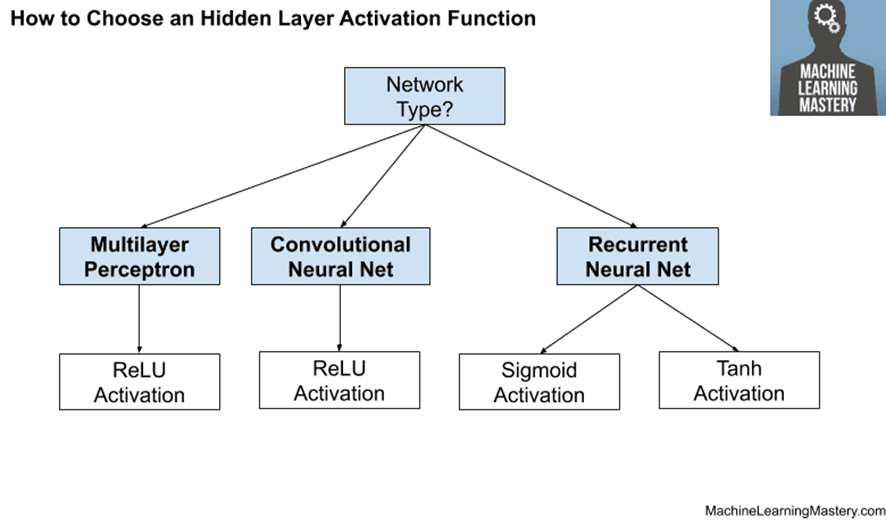

## **Activation for Output Layers**
The output layer is the layer in a neural network model that directly outputs a prediction.

All feed-forward neural network models have an output layer.

There are perhaps three activation functions you may want to consider for use in the output layer; they are:

- Linear
- Logistic (Sigmoid)
- Softmax

This is not an exhaustive list of activation functions used for output layers, but they are the most commonly used.

Let’s take a closer look at each in turn.

## **Linear Output Activation Function**
The linear activation function is also called **“identity” (multiplied by 1.0) or “no activation.”**

This is because the linear activation function does not change the weighted sum of the input in any way and instead returns the value directly.

`linear(x) = x`

Target values used to train a model with a linear activation function in the output layer are **typically scaled prior to modeling using normalization or standardization transforms**.

## **Sigmoid Output Activation Function**
The sigmoid of logistic activation function was described in the previous section.

Target labels used to train a model with a sigmoid activation function in the output layer will have the values 0 or 1.

## **Softmax Output Activation Function**
The softmax function outputs a vector of values that sum to 1.0 that can be **interpreted as probabilities of class membership.**

It is related to the argmax function that outputs a 0 for all options and 1 for the chosen option. Softmax is a “softer” version of argmax that allows a probability-like output of a winner-take-all function.

As such, the input to the function is a vector of real values and the output is a vector of the same length with values that sum to 1.0 like probabilities.

The softmax function is calculated as follows:

`e^x / sum(e^x)`

Where x is a vector of outputs and e is a mathematical constant that is the base of the natural logarithm.

Target labels used to train a model with the softmax activation function in the output layer will be vectors with 1 for the target class and 0 for all other classes.

## **How to Choose an Output Activation Function**
You must choose the activation function for your output layer based on the type of prediction problem that you are solving.

Specifically, the type of variable that is being predicted.

For example, you may divide prediction problems into two main groups, predicting a categorical variable (classification) and predicting a numerical variable (regression).

If your problem is a regression problem, you should use a linear activation function.

 - **Regression**: One node, linear activation.

If your problem is a classification problem, then there are three main types of classification problems and each may use a different activation function.

Predicting a probability is not a regression problem; it is classification. In all cases of classification, your model will predict the probability of class membership (e.g. probability that an example belongs to each class) that you can convert to a crisp class label by rounding (for sigmoid) or argmax (for softmax).

If there are two mutually exclusive classes (binary classification), then your output layer will have one node and a sigmoid activation function should be used. If there are more than two mutually exclusive classes (multiclass classification), then your output layer will have one node per class and a softmax activation should be used. If there are two or more mutually inclusive classes (multilabel classification), then your output layer will have one node for each class and a sigmoid activation function is used.

 - **Binary Classification**: One node, sigmoid activation.
 - **Multiclass Classification**: One node per class, softmax activation.
 - **Multilabel Classification**: One node per class, sigmoid activation.

The figure below summarizes how to choose an activation function for the output layer of your neural network model.

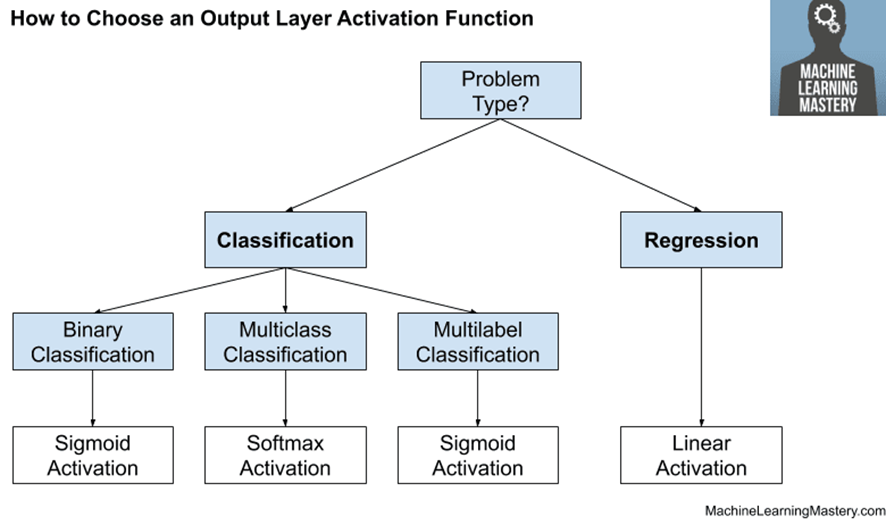